In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint

In [22]:
def diff_eq(y,t,he_loves=-5,she_responds=-8,she_loves=6,he_responds=4):
    #dHe/dt = he_loves*He + she_responds*She
    #dShe/dt = she_loves*He + he_responds*She
    #y = [He,She] current position in phase space
    
    A = np.array([[he_loves, she_responds],[she_loves,he_responds]])
    
    dydt = np.dot(A,y)
    
    return dydt #two dimensional vector [dHe/dt,dShe/dt]


def plot_solution(diff_eq, start = [1,2], t_in = np.linspace(0, 10, 100)):


    fig0, ax0 = plt.subplots(1,1,figsize=(8,8))
    #ax0.set_aspect('equal')
    
    
    y_out = odeint(diff_eq, start, t_in) #returns y's and assume t's stay stable
    
    #print(y_out.shape, type(y_out)) #should print vector of shape y and type will tell type of object
    
    #print(y_out[:,0])
    #print(t_in)
    
    plt.plot(t_in,y_out[:,0]) #[:,0] takes out first column of y...plots Romeo love over time
    plt.plot(t_in,y_out[:,1]) #plots Juliets love over time
    
    ax0.set_xlabel('time',size=14)
    ax0.set_ylabel('dy/dt',size=14)
    
    plt.grid()

    
def phase_plane(diff_eq, start = [1,2], t_in = np.linspace(0, 10, 100), args = (he_loves_list[i], he_responds_list[i], she_loves_list[i], he_responds_list[i])):
    
    
    fig, ax = plt.subplots(1,1,figsize=(8,8))
    
    for x in range(0,5):
        for y in range(1,6):
            
            y_out = odeint(diff_eq,[x,y], t_in, args = (he_loves_list[i], he_responds_list[i], she_loves_list[i], he_responds_list[i]))
    
            plt.plot(y_out[:,0],y_out[:,1])
    
    ax.set_xlabel('He',size=14)
    ax.set_ylabel('She',size=14)
    
    plt.grid()
    
    
    

(1) Put a loop (or nested loop...) in your phase plane plotting function that repeatedly uses odeint to find a solution and then plots its trajectory in the phase plane, using a different initial condition each iteration. The goal is to create a sense of trajectories everywhere in the plane, similar to the grey traces from your earlier notebook, so you’ll need to select the mesh of initial conditions sensibly.
<br>

(2) With such a plotting function in hand, return to the question of changes in the phase portrait at different parameters. In other words, you can put the phase plotting function itself in a loop like you did before. However, that will now require you to figure out how to pass extra parameters (like he_responds or the matrix A) “through” odeint to DiffEq. 

he_loves:  9 she_responds:  -8 she_loves:  -9 he_responds:  4
he_loves:  5 she_responds:  -4 she_loves:  -5 he_responds:  3
he_loves:  2 she_responds:  -1 she_loves:  -2 he_responds:  1
he_loves:  0.5 she_responds:  1 she_loves:  -0.5 he_responds:  -2
he_loves:  -3 she_responds:  4 she_loves:  3 he_responds:  -4
he_loves:  -6 she_responds:  8 she_loves:  6 he_responds:  -7


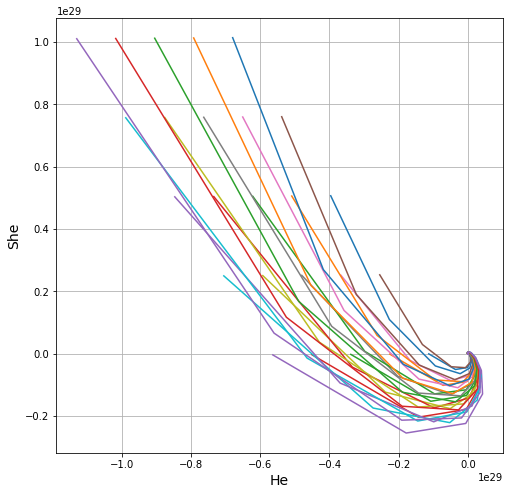

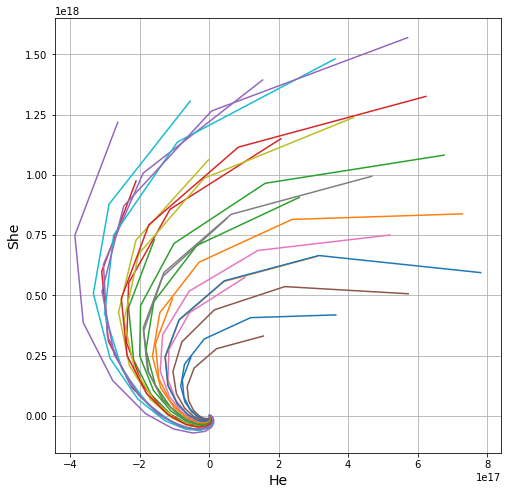

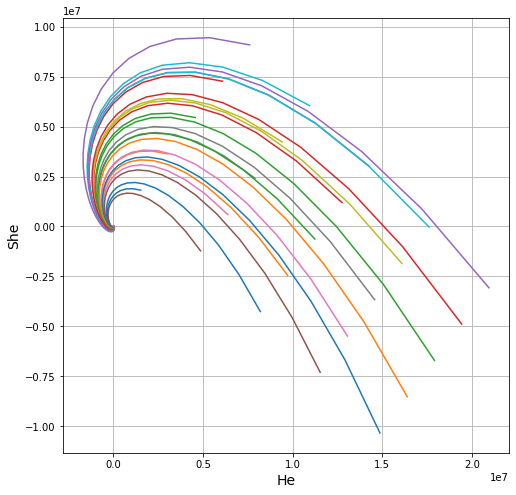

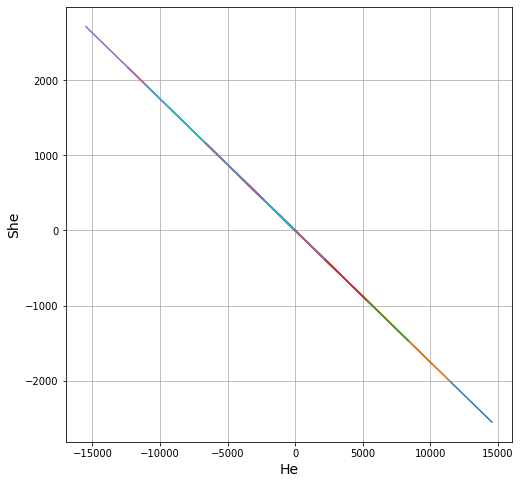

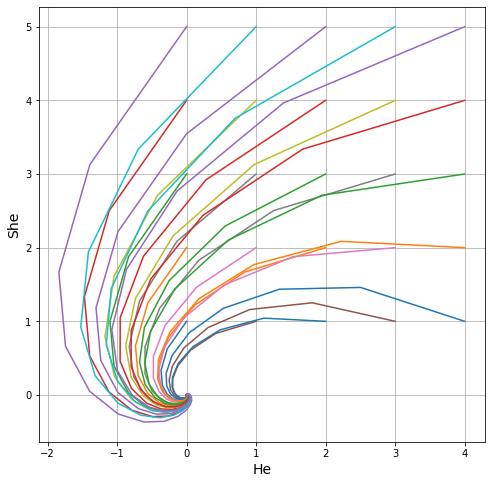

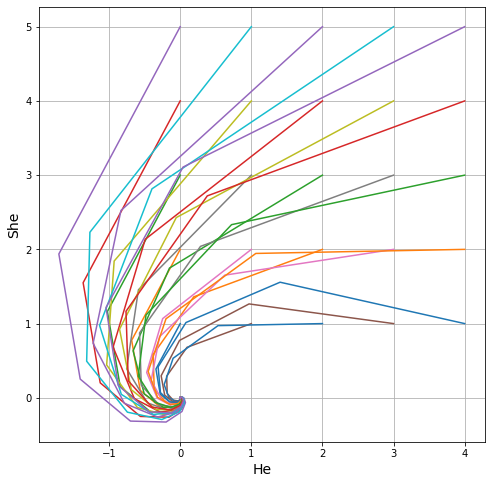

In [24]:
he_loves_list = [9, 5, 2, 0.5, -3, -6, -9]
she_responds_list = [-8, -4, -1, 1, 4, 8]
she_loves_list = [-9, -5, -2, -0.5, 3, 6, 9]
he_responds_list = [4, 3, 1, -2, -4, -7]
for i in range(6):
    print("he_loves: ", he_loves_list[i], "she_responds: ", she_responds_list[i], "she_loves: ", she_loves_list[i], "he_responds: ", he_responds_list[i])
    phase_plane(diff_eq, args = {he_loves_list[i], he_responds_list[i], she_loves_list[i], he_responds_list[i]})

" ax0.set_aspect('equal') " was making things weird. after i commented that out, i began to see different behavior...why? <br>
what does ax0.set_aspect('equal') do?...sets the ratio of y-unit to x-unit as 'equal' or 'auto' <br>
 
@(he_loves=-5,she_responds=-8,she_loves=6,he_responds=4) <br>
plt.plot(t_in,y_out[:,0]) plt.plot(t_in,y_out[:,1])  makes the lines swirl then dampen <br>
plt.plot(y_out[:,0],y_out[:,1]) yields a swirl